<a href="https://colab.research.google.com/github/aysutnyva/Machine_Learning/blob/main/kyphosis_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
!kaggle datasets download abbasit/kyphosis-dataset

Dataset URL: https://www.kaggle.com/datasets/abbasit/kyphosis-dataset
License(s): CC0-1.0
  0% 0.00/559 [00:00<?, ?B/s]
100% 559/559 [00:00<00:00, 1.28MB/s]


In [6]:
!unzip kyphosis-dataset.zip

Archive:  kyphosis-dataset.zip
  inflating: kyphosis.csv            


In [7]:
df = pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


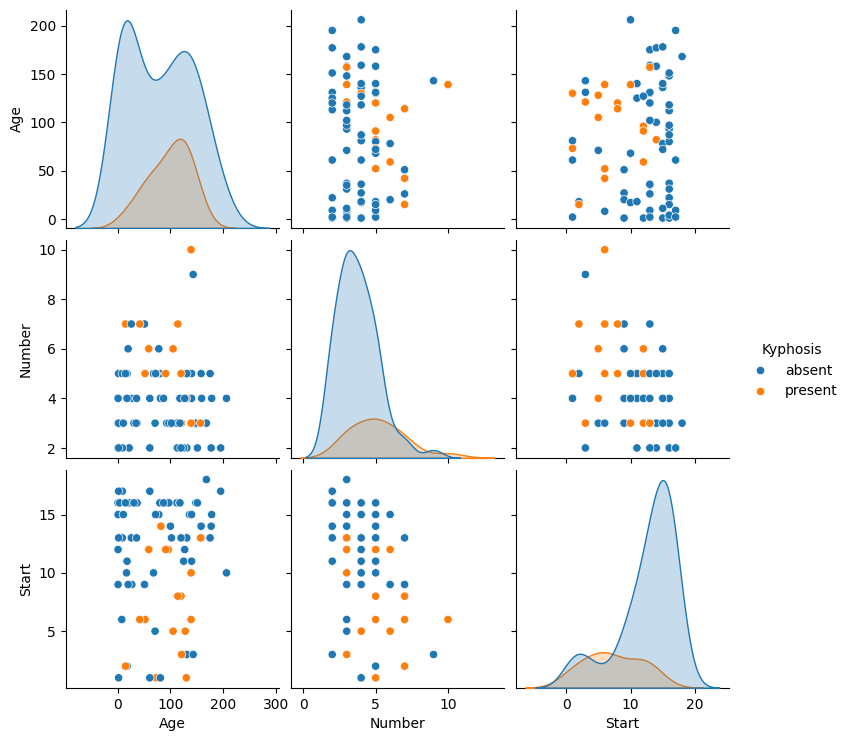

In [12]:
sns.pairplot(df, hue='Kyphosis')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

    accuracy                           0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25



In [22]:
print(confusion_matrix(y_test, predictions))

[[15  6]
 [ 2  2]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



[[19  2]
 [ 3  1]]


In [28]:
df['Kyphosis'].value_counts()

,count
Kyphosis,
absent,64
present,17


In [31]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

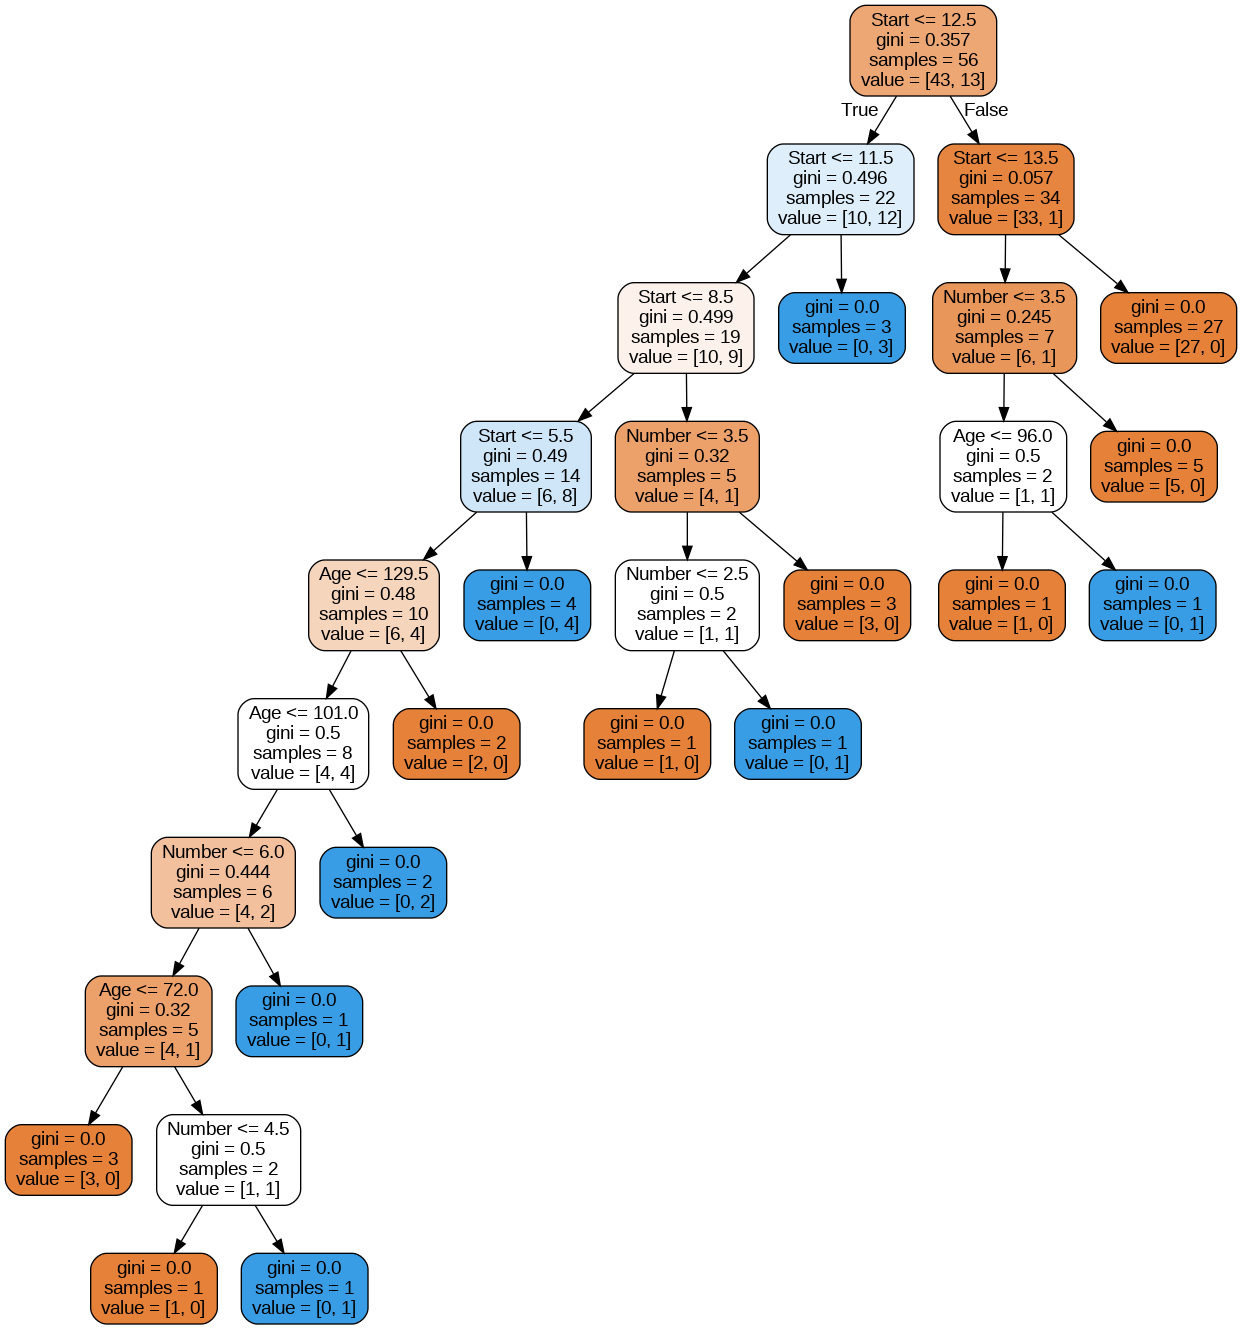

In [32]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())